In [45]:
import pandas as pd
import datetime
import calendar
import seaborn
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
import numpy as np

In [22]:
df_validation = pd.read_csv(r'../../data/tidy/energy-validation-april2022-31march.csv', delimiter=',', skiprows=0, low_memory=False)

In [23]:
df_validation

,Unnamed: 0,timestamp,equipment_id,gallons,date,Powertrain
0,58909,2022-03-31 00:11:00,3310,33.10,2022-03-31,conventional
1,58910,2022-03-31 00:17:00,3303,6.40,2022-03-31,conventional
2,58911,2022-03-31 00:25:00,3320,12.40,2022-03-31,conventional
3,58912,2022-03-31 00:41:00,3402,34.80,2022-03-31,hybrid
4,58913,2022-03-31 00:49:00,3226,39.40,2022-03-31,conventional
...,...,...,...,...,...,...
3065,59563,2022-04-30 22:52:00,3228,20.90,2022-04-30,conventional
3066,24290,2022-04-30 22:53:00,1862,41.22,2022-04-30,conventional
3067,59564,2022-04-30 23:29:00,3314,23.50,2022-04-30,conventional
3068,59565,2022-04-30 23:43:00,3401,40.60,2022-04-30,hybrid


In [24]:
df_validation['date'] = pd.to_datetime(df_validation['date'])

In [25]:
df_validation['dayofweek']=df_validation['date'].dt.dayofweek

In [27]:
df_validation

,Unnamed: 0,timestamp,equipment_id,gallons,date,Powertrain,dayofweek
0,58909,2022-03-31 00:11:00,3310,33.10,2022-03-31,conventional,3
1,58910,2022-03-31 00:17:00,3303,6.40,2022-03-31,conventional,3
2,58911,2022-03-31 00:25:00,3320,12.40,2022-03-31,conventional,3
3,58912,2022-03-31 00:41:00,3402,34.80,2022-03-31,hybrid,3
4,58913,2022-03-31 00:49:00,3226,39.40,2022-03-31,conventional,3
...,...,...,...,...,...,...,...
3065,59563,2022-04-30 22:52:00,3228,20.90,2022-04-30,conventional,5
3066,24290,2022-04-30 22:53:00,1862,41.22,2022-04-30,conventional,5
3067,59564,2022-04-30 23:29:00,3314,23.50,2022-04-30,conventional,5
3068,59565,2022-04-30 23:43:00,3401,40.60,2022-04-30,hybrid,5


In [31]:
df_validation['dayofweek'].unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [33]:
df_validation['dayofweek'].value_counts()[6]

151

In [34]:
df_validation['dayofweek'].replace(0, 'MO', inplace=True)
df_validation['dayofweek'].replace(1, 'TU', inplace=True)
df_validation['dayofweek'].replace(2, 'WE', inplace=True)
df_validation['dayofweek'].replace(3, 'TH', inplace=True)
df_validation['dayofweek'].replace(4, 'FR', inplace=True)
df_validation['dayofweek'].replace(5, 'SA', inplace=True)
df_validation['dayofweek'].replace(6, 'SU', inplace=True)

<AxesSubplot: >

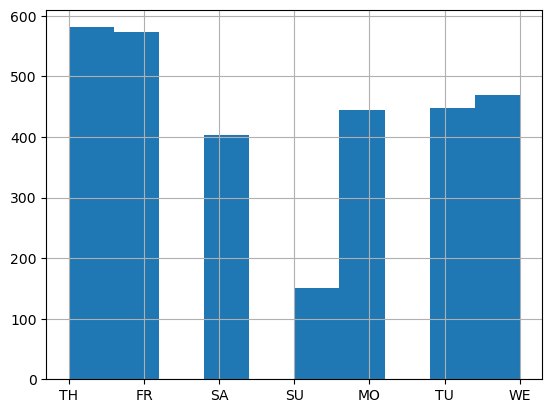

In [36]:
df_validation['dayofweek'].hist()

<AxesSubplot: xlabel='dayofweek', ylabel='Probability'>

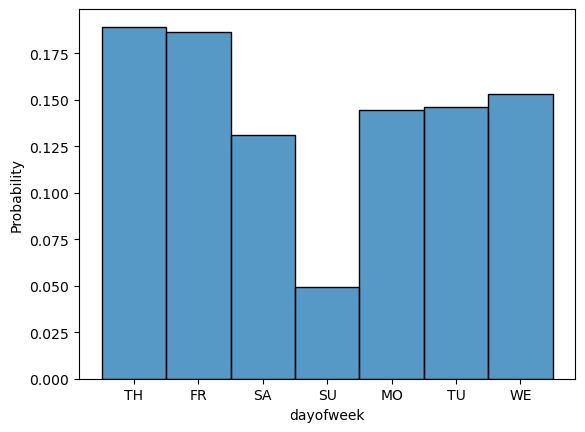

In [38]:
seaborn.histplot(
    data=df_validation,
    x='dayofweek',
    discrete=True,
    stat='probability'
)

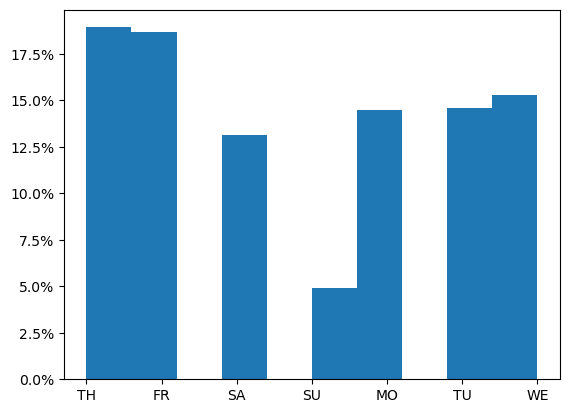

In [46]:
plt.hist(df_validation['dayofweek'], weights=np.ones(len(df_validation['dayofweek'])) / len(df_validation['dayofweek']))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

<AxesSubplot: >

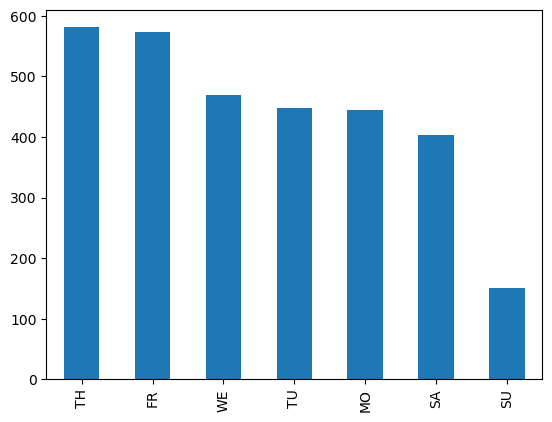

In [47]:
df_validation['dayofweek'].value_counts().plot(kind='bar')

[Text(0, 0.5, 'Percent')]

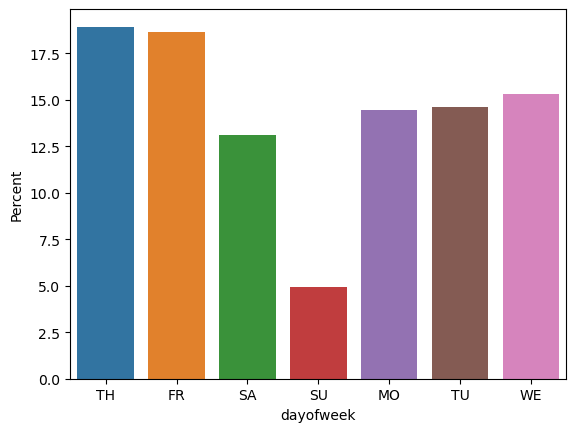

In [55]:
ax = seaborn.barplot(x="dayofweek", y="gallons", data=df_validation, estimator=lambda x: len(x) / len(df_validation) * 100, orient="v")
ax.set(ylabel="Percent")